# Análisis de Egresos Hospitalarios

En este análisis se quiere ver la cantidad de egresos hospitalarios para diversos problemas
médicos, tanto cubiertos por GES y los no GES.

En primer lugar, se quiere ver qué diagnósticos son más importantes para el Hospital del Tórax
con respecto a la cantidad de Egresos. Esto significa que una mayor cantidad de Egresos
Hospitalarios significa una mayor importancia del Hospital. Este análisis se quiere observar
acumuladamente entre 2013 y 2019, cómo también la distribución de por años.


In [1]:
import importlib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import funciones_auxiliares as aux
import funciones_auxiliares_hito_2 as aux2

sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

importlib.reload(aux2)
importlib.reload(aux)

<module 'funciones_auxiliares' from 'c:\\Users\\finanzas\\Desktop\\Javier Rojas\\Javier\\trabajo\\SSMO\\EPH\\modulo_gestion\\1.analisis_problemas_de_salud\\egresos-hospitalarios\\funciones_auxiliares.py'>

# Carga de Archivos Nacionales y Obtención de Subgrupo Tórax

In [2]:
AGRUPACION_DIAGNOSTICOS = ['Capítulo', 'Sección', 'Categoría', 'Descripción', 'DIAG1']

In [3]:
dfs = aux.leer_anios_egresos()
df_completa = pd.concat(dfs.values())

cie = aux.obtener_diccionario_cie()
completa_con_cie = pd.merge(df_completa, cie, how='left', left_on='DIAG1', right_on='CodigoSinPunto')

GLOSA_TORAX = 'Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica'
torax_con_cie = completa_con_cie.query('GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', encoding='latin-1', on_bad_lines='skip')
c:\Users\finanzas\Desktop\Javier Rojas\Javier\trabajo\SSMO\EPH\modulo_gestion\1.analisis_problemas_de_salud\egresos-hospitalarios\funciones_auxiliares.py:53: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[anio] = pd.read_csv(ruta, delimiter=';', 

# Analisis de Ranking del Torax - Número de Egresos

En este apartado se quiere identificar qué problemas de salud son los más importantes para el
Hospital del Tórax internamente. Para esto, se quiere identificar los 10 diagnósticos que tengan
la mayor cantidad de Egresos Hospitalarios. Esto se quiere realizar a nivel global (2013 a 2019) y
por año.

In [4]:
agrupacion_global = AGRUPACION_DIAGNOSTICOS
top_n = 10

n_egresos_global = torax_con_cie.groupby(agrupacion_global)['TIPO_EDAD'].count()
n_egresos_global = n_egresos_global.sort_values(ascending=False)
n_egresos_global = n_egresos_global.head(top_n)

agrupacion_por_anio = ['ANO_EGRESO'] + AGRUPACION_DIAGNOSTICOS

n_egresos_por_anio = torax_con_cie.groupby(agrupacion_por_anio)['TIPO_EDAD'].count().reset_index()
n_egresos_por_anio = n_egresos_por_anio.sort_values(by=['ANO_EGRESO', 'TIPO_EDAD'], ascending=False)
n_egresos_por_anio = n_egresos_por_anio.groupby('ANO_EGRESO').head(10)
n_egresos_por_anio['Ranking'] = n_egresos_por_anio.groupby('ANO_EGRESO').cumcount()

In [5]:
n_egresos_por_anio.to_csv('output/ranking_torax_interno/ranking_n_egresos_interno.csv',
                          sep=';',
                          encoding='latin-1')

Al analizar los datos en PowerBi, se encontró que los diagnósticos con la mayor cantidad de egresos
a lo largo de los años (acumulado) fueron:

|    | Descripción                                                                      | DIAG1   |   TIPO_EDAD |
|---:|:---------------------------------------------------------------------------------|:--------|------------:|
|  0 | Sesión de quimioterapia por tumor                                                | Z511    |        3501 |
|  1 | Enfermedad aterosclerótica del corazón                                           | I251    |        2229 |
|  2 | Atención preparatoria para tratamiento subsecuente, no clasificado en otra parte | Z514    |        1932 |
|  3 | Tumor maligno del lóbulo superior, bronquio o pulmón                             | C341    |        1365 |
|  4 | Otras enfermedades pulmonares intersticiales con fibrosis                        | J841    |         850 |
|  5 | Otras atenciones médicas especificadas                                           | Z518    |         847 |
|  6 | Estenosis (de la válvula) aórtica                                                | I350    |         835 |
|  7 | Tumor maligno del lóbulo inferior, bronquio o pulmón                             | C343    |         817 |
|  8 | Asistencia y ajuste de marcapaso cardíaco                                        | Z450    |         732 |
|  9 | Inmunoterapia profiláctica                                                       | Z291    |         651 |

Al analizar los datos por año, se encontró que los diagnósticos con la mayor cantidad de egresos por
año fueron:

In [6]:
columnas_a_mostrar = ['Ranking', 'ANO_EGRESO', 'Descripción', 'DIAG1', 'TIPO_EDAD']
display(n_egresos_por_anio[columnas_a_mostrar].reset_index(drop=True))

,Ranking,ANO_EGRESO,Descripción,DIAG1,TIPO_EDAD
0,0,2019,Sesión de quimioterapia por tumor,Z511,611
1,1,2019,Atención preparatoria para tratamiento subsecu...,Z514,476
2,2,2019,Enfermedad aterosclerótica del corazón,I251,323
3,3,2019,Inmunoterapia profiláctica,Z291,302
4,4,2019,"Tumor maligno del lóbulo superior, bronquio o ...",C341,220
...,...,...,...,...,...
65,5,2013,Atención preparatoria para tratamiento subsecu...,Z514,140
66,6,2013,Otras enfermedades pulmonares intersticiales c...,J841,125
67,7,2013,Estenosis (de la válvula) aórtica,I350,105
68,8,2013,Tumor maligno secundario del pulmón,C780,89


# Ranking Tórax - Comparación Nacional

En este apartado se quiere responder a las preguntas:

- En que posición se encuentran los diagnósticos presentes en el Hospital del Tórax tanto a nivel
Nacional, como en nivel Público y Privado?

## Ranking Todos Los Anios

In [7]:
def aplanar_columnas(df):
    tmp = df.copy()

    tmp.columns = ['_'.join(col).strip('_') for col in tmp.columns]

    return tmp


def obtener_diagnosticos_hospital(df, glosa):
    diagnosticos_hospital = df.query('GLOSA_ESTABLECIMIENTO_SALUD == @glosa')

    return diagnosticos_hospital['DIAG1'].unique()


def calcular_porcentaje_metrica_por_diagnostico(df, subgrupo_ranking, variable_a_analizar):
    return df[variable_a_analizar] / df.groupby(subgrupo_ranking)[variable_a_analizar].transform('sum')


def obtener_ranking_total(df, agrupar_por, subgrupo_ranking, variable_a_analizar):
    tmp = df.copy()

    df_agrupada = tmp.groupby(agrupar_por).agg({'TIPO_EDAD': sum, 'DIAS_ESTADA': [sum, np.mean]})

    df_agrupada = aplanar_columnas(df_agrupada)
    orden_ranking = subgrupo_ranking + variable_a_analizar
    df_agrupada = df_agrupada.sort_values(orden_ranking, ascending=False)

    df_agrupada['TIPO_EDAD_sum_%'] = calcular_porcentaje_metrica_por_diagnostico(
        df_agrupada, subgrupo_ranking, 'TIPO_EDAD_sum')
    df_agrupada['DIAS_ESTADA_sum_%'] = calcular_porcentaje_metrica_por_diagnostico(
        df_agrupada, subgrupo_ranking, 'DIAS_ESTADA_sum')
    df_agrupada['DIAS_ESTADA_mean_%'] = calcular_porcentaje_metrica_por_diagnostico(
        df_agrupada, subgrupo_ranking, 'DIAS_ESTADA_mean')

    orden_columnas = ['TIPO_EDAD_sum', 'TIPO_EDAD_sum_%', 'DIAS_ESTADA_sum', 'DIAS_ESTADA_sum_%',
                      'DIAS_ESTADA_mean', 'DIAS_ESTADA_mean_%']

    df_agrupada = df_agrupada[orden_columnas]

    df_agrupada = df_agrupada.reset_index()

    return df_agrupada


def obtener_tabla_posicion_hospital_en_ranking(ranking, glosa_hospital, subgrupo_ranking):
    tmp = ranking.copy()

    tmp['Ranking'] = (tmp.groupby(subgrupo_ranking).cumcount()) + 1
    tmp = tmp.query('GLOSA_ESTABLECIMIENTO_SALUD == @glosa_hospital')
    tmp = tmp.sort_values('Ranking').reset_index(drop=True)

    return tmp


def analizar_ranking_hospital(df, hospital_a_analizar, agrupar_por, subgrupo_ranking, variable_a_analizar):
    tabla_ranking_global = obtener_ranking_total(
        df, agrupar_por, subgrupo_ranking, variable_a_analizar)
    tabla_posicion_hospital = obtener_tabla_posicion_hospital_en_ranking(tabla_ranking_global,
                                                                         hospital_a_analizar,
                                                                         subgrupo_ranking)

    return tabla_ranking_global, tabla_posicion_hospital


def unir_tablas_de_posicion_por_diagnostico(diccionario_tablas_posicion):
    df_inicial = list(diccionario_tablas_posicion.values())[0].copy()

    for tipo_tabla, df in list(diccionario_tablas_posicion.items())[1:]:
        df_inicial = pd.merge(df_inicial, df, how='outer', on='DIAG1', suffixes=[None, tipo_tabla])

    return df_inicial


## Ranking Todos los años - Nacional

In [11]:
PERTENECE_SNSS = "Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS"
NO_PERTENECE_SNSS = "No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS"

In [8]:
# El primer paso consiste en dejar solo los diagnosticos historicos que tenga el Torax.
# Luego hacer todos los analisis que se quieran.
diagnosticos_torax = obtener_diagnosticos_hospital(completa_con_cie, GLOSA_TORAX)
completa_diags_torax = completa_con_cie[completa_con_cie['DIAG1'].isin(diagnosticos_torax)]

In [9]:
agrupacion = ['GLOSA_ESTABLECIMIENTO_SALUD'] + AGRUPACION_DIAGNOSTICOS
subgrupos = ['DIAG1']
variable_ranking = ['TIPO_EDAD_sum']

ranking_nacional, tabla_posicion_nacional = analizar_ranking_hospital(completa_con_cie, GLOSA_TORAX,
                                                                      agrupacion, subgrupos,
                                                                      variable_ranking)

# Ranking por Todos los años - Publico

In [13]:
# Primero, se hace el filtro de los establecimientos publicos, y luego de los diagnosticos que
# tenga el Torax
df_publicos = completa_diags_torax.query('PERTENENCIA_ESTABLECIMIENTO_SALUD == @PERTENECE_SNSS')

In [14]:
ranking_publicos, tabla_posicion_publico = analizar_ranking_hospital(df_publicos, GLOSA_TORAX,
                                                                     agrupacion, subgrupos,
                                                                     variable_ranking)

# Ranking por Todos los anios - Privado

En este caso, se inserta al Torax dentro de todos los establecimientos Privados con un OR.

In [16]:
df_privados = completa_diags_torax.query('PERTENENCIA_ESTABLECIMIENTO_SALUD == @NO_PERTENECE_SNSS '
                                        'or GLOSA_ESTABLECIMIENTO_SALUD == @GLOSA_TORAX')

In [17]:
ranking_privados, tabla_posicion_privados = analizar_ranking_hospital(df_privados, GLOSA_TORAX,
                                                                     agrupacion, subgrupos,
                                                                     variable_ranking)

# Finalmente, hay que ver la posicion en las 3 categorias para cada diagnostico

In [73]:
diccionario_posiciones = {'_Nacional': tabla_posicion_nacional,
                          '_Publico': tabla_posicion_publico,
                          '_Privado': tabla_posicion_privados}

FILTRO_COLUMNAS_RANKING = (['GLOSA_ESTABLECIMIENTO_SALUD'] + AGRUPACION_DIAGNOSTICOS + 
                           ['Ranking_Interno', 'Ranking', 'Ranking_Publico', 'Ranking_Privado',
                            'TIPO_EDAD_sum', 'TIPO_EDAD_sum_%_Interno', 
                            'TIPO_EDAD_sum_%', 'TIPO_EDAD_sum_%_Privado', 
                            'TIPO_EDAD_sum_%_Publico'])

In [80]:
union = unir_tablas_de_posicion_por_diagnostico(diccionario_posiciones).sort_values('TIPO_EDAD_sum',
                                                                                    ascending=False)
union['Ranking_Interno'] = (union.reset_index().index) + 1
union['TIPO_EDAD_sum_%_Interno'] = union['TIPO_EDAD_sum'] / union['TIPO_EDAD_sum'].sum()
resumen = union[FILTRO_COLUMNAS_RANKING]
resumen.to_csv('output/ranking_torax_pais/resumen_posiciones_torax_acumulado.csv', 
               encoding='latin-1', sep=';')

In [48]:
top_10_egresos_internos = resumen.sort_values('TIPO_EDAD_sum', ascending=False)

top_10_egresos_nacionales = resumen.sort_values(['TIPO_EDAD_sum_%', 'Ranking'], 
                            ascending=[False, True]).head(10)

top_10_egresos_privados = resumen.sort_values(['TIPO_EDAD_sum_%_Privado', 'Ranking_Privado'], 
                            ascending=[False, True]).head(10)

top_10_egresos_publico = resumen.sort_values(['TIPO_EDAD_sum_%_Publico', 'Ranking_Publico'], 
                            ascending=[False, True]).head(10)

In [51]:
print('Los 10 diagnosticos con la mayor cantidad de egresos internos son:')
display(top_10_egresos_internos.head(10))

print('Los 10 diagnosticos con la mayor relevancia Nacional son:')
display(top_10_egresos_nacionales.head(10))

print('Los 10 diagnosticos con la mayor relevancia Publica son:')
display(top_10_egresos_publico.head(10))

print('Los 10 diagnosticos con la mayor relevancia Privada son:')
display(top_10_egresos_privados.head(10))

Los 10 diagnosticos con la mayor cantidad de egresos internos son:


,GLOSA_ESTABLECIMIENTO_SALUD,Capítulo,Sección,Categoría,Descripción,DIAG1,Ranking,Ranking_Publico,Ranking_Privado,TIPO_EDAD_sum,TIPO_EDAD_sum_%,TIPO_EDAD_sum_%_Privado,TIPO_EDAD_sum_%_Publico
198,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Sesión de quimioterapia por tumor,Z511,6,4,3,3501,0.057207,0.111189,0.105411
104,Instituto Nacional de Enfermedades Respiratori...,Cap.09 ENFERMEDADES DEL APARATO CIRCULATORIO ...,I20-I25 ENFERMEDADES ISQUÉMICAS CARDIACAS,I25 ENFERMEDAD ISQUÉMICA CRÓNICA DEL CORAZÓN,Enfermedad aterosclerótica del corazón,I251,2,2,1,2229,0.101415,0.258465,0.143031
67,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Atención preparatoria para tratamiento subsecu...,Z514,1,1,1,1932,0.640371,0.720896,0.851476
7,Instituto Nacional de Enfermedades Respiratori...,Cap.02 NEOPLASIAS (C00-D49),C30-C39 NEOPLASIAS MALIGNAS DE ÓRGANOS RESPIR...,C34 TUMOR MALIGNO DE LOS BRONQUIOS Y DEL PULMÓN,"Tumor maligno del lóbulo superior, bronquio o ...",C341,1,1,1,1365,0.493671,0.548854,0.830797
56,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J80-J84 OTRAS ENFERMEDADES RESPIRATORIAS QUE ...,J84 OTRAS ENFERMEDADES PULMONARES INTERSTICIALES,Otras enfermedades pulmonares intersticiales c...,J841,1,1,1,850,0.075995,0.283712,0.094037
201,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Otras atenciones médicas especificadas,Z518,6,2,5,847,0.055779,0.072263,0.196474
152,Instituto Nacional de Enfermedades Respiratori...,Cap.09 ENFERMEDADES DEL APARATO CIRCULATORIO ...,I30-I52 OTRAS FORMAS DE ENFERMEDAD CARDIACA,I35 TRASTORNOS DE VÁLVULA AÓRTICA NO REUMÁTICOS,Estenosis (de la válvula) aórtica,I350,3,3,1,835,0.092953,0.265670,0.125094
5,Instituto Nacional de Enfermedades Respiratori...,Cap.02 NEOPLASIAS (C00-D49),C30-C39 NEOPLASIAS MALIGNAS DE ÓRGANOS RESPIR...,C34 TUMOR MALIGNO DE LOS BRONQUIOS Y DEL PULMÓN,"Tumor maligno del lóbulo inferior, bronquio o ...",C343,1,1,1,817,0.475000,0.523718,0.836233
105,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z45 ASISTENCIA Y AJUSTE DE DISPOSITIVOS IMPLAN...,Asistencia y ajuste de marcapaso cardíaco,Z450,2,2,1,732,0.106815,0.232160,0.165162
82,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z20-Z29 PERSONAS CON RIESGOS POTENCIALES DE S...,Z29 NECESIDAD DE OTRAS MEDIDAS PROFILÁCTICAS,Inmunoterapia profiláctica,Z291,1,1,1,651,0.265931,0.369467,0.486911


Los 10 diagnosticos con la mayor relevancia Nacional son:


,GLOSA_ESTABLECIMIENTO_SALUD,Capítulo,Sección,Categoría,Descripción,DIAG1,Ranking,Ranking_Publico,Ranking_Privado,TIPO_EDAD_sum,TIPO_EDAD_sum_%,TIPO_EDAD_sum_%_Privado,TIPO_EDAD_sum_%_Publico
0,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z99 DEPENDENCIA DE MÁQUINAS Y DISPOSITIVOS CAP...,Dependencia de otras máquinas y dispositivos c...,Z998,1,1,1,1,1.000000,1.000000,1.000000
65,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J67 NEUMONITIS DEBIDA A HIPERSENSIBILIDAD AL P...,Pulmón del ornitófilo,J672,1,1,1,1,1.000000,1.000000,1.000000
69,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z82 HISTORIA FAMILIAR DE CIERTAS DISCAPACIDADE...,Historia familiar de ceguera o pérdida de la v...,Z821,1,1,1,1,1.000000,1.000000,1.000000
72,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J63 NEUMOCONIOSIS DEBIDA A OTROS POLVOS INORGÁ...,Beriliosis,J632,1,1,1,8,0.800000,0.888889,0.888889
58,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J67 NEUMONITIS DEBIDA A HIPERSENSIBILIDAD AL P...,Neumonitis debida a hipersensibilidad a polvo ...,J679,1,1,1,393,0.685864,0.802041,0.825630
61,Instituto Nacional de Enfermedades Respiratori...,Cap.01 CIERTAS ENFERMEDADES INFECCIOSAS Y PAR...,A15-A19 TUBERCULOSIS,"A15 TUBERCULOSIS RESPIRATORIA, CONFIRMADA BACT...","Tuberculosis del pulmón, confirmada histológic...",A152,1,1,1,144,0.663594,0.852071,0.750000
67,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Atención preparatoria para tratamiento subsecu...,Z514,1,1,1,1932,0.640371,0.720896,0.851476
45,Instituto Nacional de Enfermedades Respiratori...,Cap.09 ENFERMEDADES DEL APARATO CIRCULATORIO ...,I05-I09 ENFERMEDADES REUMÁTICAS CRÓNICAS CARD...,I08 ENFERMEDADES VALVULARES MÚLTIPLES,Trastornos de las válvulas mitral y tricúspide,I081,1,1,1,268,0.594235,0.761364,0.730245
63,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,J91 DERRAME PLEURAL EN AFECCIONES CLASIFICADAS...,Derrame pleural en afecciones clasificadas en ...,J91X,1,1,1,31,0.563636,0.837838,0.632653
1,Instituto Nacional de Enfermedades Respiratori...,Cap.02 NEOPLASIAS (C00-D49),C30-C39 NEOPLASIAS MALIGNAS DE ÓRGANOS RESPIR...,"C38 TUMOR MALIGNO DEL CORAZÓN, DEL MEDIASTINO ...",Tumor maligno del mediastino anterior,C381,1,1,1,169,0.546926,0.665354,0.754464


Los 10 diagnosticos con la mayor relevancia Publica son:


,GLOSA_ESTABLECIMIENTO_SALUD,Capítulo,Sección,Categoría,Descripción,DIAG1,Ranking,Ranking_Publico,Ranking_Privado,TIPO_EDAD_sum,TIPO_EDAD_sum_%,TIPO_EDAD_sum_%_Privado,TIPO_EDAD_sum_%_Publico
0,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z99 DEPENDENCIA DE MÁQUINAS Y DISPOSITIVOS CAP...,Dependencia de otras máquinas y dispositivos c...,Z998,1,1,1,1,1.000000,1.000000,1.000000
65,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J67 NEUMONITIS DEBIDA A HIPERSENSIBILIDAD AL P...,Pulmón del ornitófilo,J672,1,1,1,1,1.000000,1.000000,1.000000
69,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z82 HISTORIA FAMILIAR DE CIERTAS DISCAPACIDADE...,Historia familiar de ceguera o pérdida de la v...,Z821,1,1,1,1,1.000000,1.000000,1.000000
89,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J67 NEUMONITIS DEBIDA A HIPERSENSIBILIDAD AL P...,Suberosis,J673,2,1,2,1,0.200000,0.200000,1.000000
214,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z00-Z13 PERSONAS EN CONTACTO CON LOS SERVICIO...,Z10 CONTROL GENERAL DE SALUD DE RUTINA DE SUBP...,Examen de salud ocupacional,Z100,6,1,6,1,0.111111,0.111111,1.000000
225,Instituto Nacional de Enfermedades Respiratori...,Cap.12 ENFERMEDADES DE LA PIEL Y DEL TEJIDO S...,L55-L59 TRASTORNOS DE LA PIEL Y DEL TEJIDO SU...,L58 RADIODERMATITIS,Radiodermatitis crónica,L581,7,1,7,1,0.142857,0.142857,1.000000
72,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J63 NEUMOCONIOSIS DEBIDA A OTROS POLVOS INORGÁ...,Beriliosis,J632,1,1,1,8,0.800000,0.888889,0.888889
59,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z20-Z29 PERSONAS CON RIESGOS POTENCIALES DE S...,Z29 NECESIDAD DE OTRAS MEDIDAS PROFILÁCTICAS,Otra quimioterapia profiláctica,Z292,1,1,1,135,0.392442,0.419255,0.859873
26,Instituto Nacional de Enfermedades Respiratori...,"Cap.19 LESIONES TRAUMÁTICAS, ENVENENAMIENTOS ...",T80-T88 COMPLICACIONES DE LA ATENCIÓN QUIRÚRG...,T86 FALLA Y RECHAZO DEL TRASPLANTE DE ÓRGANOS ...,Falla y rechazo de trasplante de pulmón-corazón,T863,1,1,1,6,0.428571,0.461538,0.857143
67,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Atención preparatoria para tratamiento subsecu...,Z514,1,1,1,1932,0.640371,0.720896,0.851476


Los 10 diagnosticos con la mayor relevancia Privada son:


,GLOSA_ESTABLECIMIENTO_SALUD,Capítulo,Sección,Categoría,Descripción,DIAG1,Ranking,Ranking_Publico,Ranking_Privado,TIPO_EDAD_sum,TIPO_EDAD_sum_%,TIPO_EDAD_sum_%_Privado,TIPO_EDAD_sum_%_Publico
0,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z99 DEPENDENCIA DE MÁQUINAS Y DISPOSITIVOS CAP...,Dependencia de otras máquinas y dispositivos c...,Z998,1,1,1,1,1.000000,1.000000,1.000000
65,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J67 NEUMONITIS DEBIDA A HIPERSENSIBILIDAD AL P...,Pulmón del ornitófilo,J672,1,1,1,1,1.000000,1.000000,1.000000
69,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z77-Z99 PERSONAS CON RIESGOS POTENCIALES DE S...,Z82 HISTORIA FAMILIAR DE CIERTAS DISCAPACIDADE...,Historia familiar de ceguera o pérdida de la v...,Z821,1,1,1,1,1.000000,1.000000,1.000000
130,Instituto Nacional de Enfermedades Respiratori...,Cap.01 CIERTAS ENFERMEDADES INFECCIOSAS Y PAR...,A30-A49 OTRAS ENFERMEDADES BACTERIANAS,A43 NOCARDIOSIS,Nocardiosis cutánea,A431,3,3,1,1,0.333333,1.000000,0.333333
195,Instituto Nacional de Enfermedades Respiratori...,Cap.01 CIERTAS ENFERMEDADES INFECCIOSAS Y PAR...,B50-B64 ENFERMEDADES CAUSADAS POR PROTOZOOS,B57 ENFERMEDAD DE CHAGAS,Enfermedad de Chagas aguda que no afecta al co...,B571,5,5,1,1,0.200000,1.000000,0.200000
203,Instituto Nacional de Enfermedades Respiratori...,"Cap.15 EMBARAZO, PARTO Y PUERPERIO (O00-O9A)",O85-O92 COMPLICACIONES PRINCIPALMENTE RELACIO...,O88 EMBOLIA OBSTÉTRICA,"Embolia séptica y piémica, obstétrica",O883,6,6,1,1,0.166667,1.000000,0.166667
72,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J60-J70 ENFERMEDADES PULMONARES POR AGENTES E...,J63 NEUMOCONIOSIS DEBIDA A OTROS POLVOS INORGÁ...,Beriliosis,J632,1,1,1,8,0.800000,0.888889,0.888889
61,Instituto Nacional de Enfermedades Respiratori...,Cap.01 CIERTAS ENFERMEDADES INFECCIOSAS Y PAR...,A15-A19 TUBERCULOSIS,"A15 TUBERCULOSIS RESPIRATORIA, CONFIRMADA BACT...","Tuberculosis del pulmón, confirmada histológic...",A152,1,1,1,144,0.663594,0.852071,0.750000
63,Instituto Nacional de Enfermedades Respiratori...,Cap.10 ENFERMEDADES DEL APARATO RESPIRATORIO ...,J90-J94 OTRAS ENFERMEDADES DE LA PLEURA,J91 DERRAME PLEURAL EN AFECCIONES CLASIFICADAS...,Derrame pleural en afecciones clasificadas en ...,J91X,1,1,1,31,0.563636,0.837838,0.632653
84,Instituto Nacional de Enfermedades Respiratori...,Cap.09 ENFERMEDADES DEL APARATO CIRCULATORIO ...,I05-I09 ENFERMEDADES REUMÁTICAS CRÓNICAS CARD...,I08 ENFERMEDADES VALVULARES MÚLTIPLES,Trastornos de las válvulas aórtica y tricúspide,I082,2,2,1,45,0.288462,0.803571,0.310345


## Ranking de Problemas GES y no GES

Además del análisis exploratorio, existen problemas GES y no GES que actualmente tienen una
relevancia para el hospital. Por lo tanto, es necesario observar en qué posición se encuentran. Los
problemas son:

**Problemas GES:**

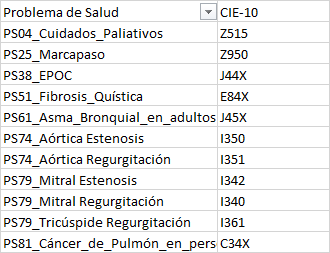

**Problemas no-GES:**

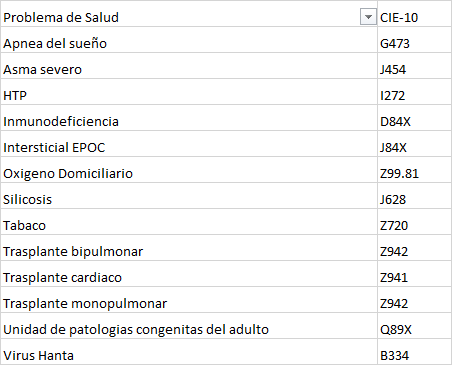

In [61]:
resumen.query('DIAG1 == "Z515"')

,GLOSA_ESTABLECIMIENTO_SALUD,Capítulo,Sección,Categoría,Descripción,DIAG1,Ranking,Ranking_Publico,Ranking_Privado,TIPO_EDAD_sum,TIPO_EDAD_sum_%,TIPO_EDAD_sum_%_Privado,TIPO_EDAD_sum_%_Publico
390,Instituto Nacional de Enfermedades Respiratori...,Cap.21 FACTORES QUE INFLUYEN EN EL ESTADO DE ...,Z40-Z54 CONTACTOS PARA OTRA ATENCIÓN ESPECÍFI...,Z51 OTRA ATENCIÓN MÉDICA,Atención paliativa,Z515,24,11,14,3,0.000836,0.008086,0.000932


# Ranking por año

En este caso, se obtiene un DataFrame por cada uno de los años. Luego, se filtra por los
diagnosticos que tenga el Tórax en esos años, y finalemnte se hace la tabla de ranking.

In [43]:
agrupacion_anio = ['ANO_EGRESO', 'GLOSA_ESTABLECIMIENTO_SALUD'] + AGRUPACION_DIAGNOSTICOS
subgrupos_anio = ['ANO_EGRESO', 'DIAG1']
variables_anio = ['TIPO_EDAD_sum']

In [65]:
ranking_por_anio, tabla_posicion_por_anio = analizar_ranking_hospital(completa_con_cie, GLOSA_TORAX, 
                                                                      agrupacion_anio, 
                                                                      subgrupos_anio, 
                                                                      variables_anio)

ranking_por_anio_publico, tabla_posicion_por_anio_publico = analizar_ranking_hospital(df_publicos, 
                                                                                      GLOSA_TORAX,
                                                                                      agrupacion_anio,
                                                                                      subgrupos_anio,
                                                                                      variables_anio)

ranking_por_anio_privado, tabla_posicion_por_anio_privado = analizar_ranking_hospital(df_privados, GLOSA_TORAX,
                                                                                      agrupacion_anio,
                                                                                      subgrupos_anio, variables_anio)

resumen_anio_nacional = tabla_posicion_por_anio.pivot_table(index='DIAG1', columns='ANO_EGRESO', values='Ranking')
resumen_anio_publico = tabla_posicion_por_anio_publico.pivot_table(index='DIAG1', columns='ANO_EGRESO', values='Ranking')
resumen_anio_privado = tabla_posicion_por_anio_privado.pivot_table(index='DIAG1', columns='ANO_EGRESO', values='Ranking')

In [104]:
tabla_posicion_por_anio['Estrato'] = 'Nacional'
tabla_posicion_por_anio_publico['Estrato'] = 'Publico'
tabla_posicion_por_anio_privado['Estrato'] = 'Privado'
union_por_anio = pd.concat([tabla_posicion_por_anio, tabla_posicion_por_anio_publico, 
                            tabla_posicion_por_anio_privado])

resumen_por_anio = union_por_anio.pivot_table(index='DIAG1', values='Ranking', 
                                     columns=['ANO_EGRESO', 'Estrato'])

In [105]:
resumen_por_anio

ANO_EGRESO     2013                     2014                     2015          \
Estrato    Nacional Privado Publico Nacional Privado Publico Nacional Privado   
DIAG1                                                                           
A047           95.0    35.0    61.0      NaN     NaN     NaN      NaN     NaN   
A083           51.0    20.0    32.0      NaN     NaN     NaN      NaN     NaN   
A084            NaN     NaN     NaN      NaN     NaN     NaN      NaN     NaN   
A090            NaN     NaN     NaN    180.0    53.0   128.0    186.0    59.0   
A099          166.0    51.0   116.0    187.0    56.0   132.0    181.0    54.0   
...             ...     ...     ...      ...     ...     ...      ...     ...   
Z951            NaN     NaN     NaN      4.0     4.0     1.0      NaN     NaN   
Z952            NaN     NaN     NaN      3.0     3.0     1.0      2.0     1.0   
Z978            4.0     4.0     1.0      NaN     NaN     NaN      NaN     NaN   
Z988            NaN     NaN     NaN      8.0     3.0     6.0     33.0    11.0   
Z998            NaN     NaN     NaN      1.0     1.0     1.0      NaN     NaN   

ANO_EGRESO             2016  ...             2017                     2018  \
Estrato    Publico Nacional  ... Publico Nacional Privado Publico Nacional   
DIAG1                        ...                                             
A047           NaN      NaN  ...     NaN     97.0    31.0    67.0      NaN   
A083           NaN      NaN  ...     NaN      NaN     NaN     NaN      NaN   
A084           NaN      NaN  ...     NaN      NaN     NaN     NaN     89.0   
A090         128.0      NaN  ...     NaN      NaN     NaN     NaN      NaN   
A099         128.0    170.0  ...   118.0    178.0    55.0   124.0    153.0   
...            ...      ...  ...     ...      ...     ...     ...      ...   
Z951           NaN      NaN  ...     NaN      NaN     NaN     NaN      NaN   
Z952           2.0      NaN  ...     NaN      NaN     NaN     NaN      NaN   
Z978           NaN      NaN  ...     NaN      NaN     NaN     NaN      NaN   
Z988          23.0      7.0  ...     4.0      8.0     3.0     6.0      NaN   
Z998           NaN      NaN  ...     NaN      NaN     NaN     NaN      NaN   

ANO_EGRESO                     2019                  
Estrato    Privado Publico Nacional Privado Publico  
DIAG1                                                
A047           NaN     NaN      NaN     NaN     NaN  
A083           NaN     NaN      NaN     NaN     NaN  
A084          27.0    63.0     80.0    24.0    57.0  
A090           NaN     NaN      NaN     NaN     NaN  
A099          50.0   104.0    152.0    47.0   106.0  
...            ...     ...      ...     ...     ...  
Z951           NaN     NaN      NaN     NaN     NaN  
Z952           NaN     NaN      NaN     NaN     NaN  
Z978           NaN     NaN      NaN     NaN     NaN  
Z988           NaN     NaN      NaN     NaN     NaN  
Z998           NaN     NaN      NaN     NaN     NaN  

[889 rows x 21 columns]